In [55]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [63]:
cash_request_df = pd.read_csv('extract - cash request - data analyst.csv')
fees_df = pd.read_csv('extract - fees - data analyst - .csv')

In [61]:
cash_request_df.columns

Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')

In [65]:
fees_df.columns

Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')

In [71]:
# ensure date columns are in datetime format
cash_request_df['created_at'] = pd.to_datetime(cash_request_df['created_at'])
fees_df['created_at'] = pd.to_datetime(fees_df['created_at'])

In [85]:
###COHORTS BASED ON FIRST CASH REQUEST

In [75]:
# asign each user to the first cash request == cohort
cash_request_df['cohort'] = cash_request_df.groupby('user_id')['created_at'].transform('min')

In [79]:
# convert cohort and created_at to a monthly period 
cash_request_df['cohort_month'] = pd.to_datetime(cash_request_df['cohort']).dt.to_period('M')
cash_request_df['request_month'] = pd.to_datetime(cash_request_df['created_at']).dt.to_period('M')

/var/folders/0b/0nt_hmld68j1x9vbn6980snc0000gn/T/ipykernel_56010/3897907744.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request_df['cohort_month'] = pd.to_datetime(cash_request_df['cohort']).dt.to_period('M')
/var/folders/0b/0nt_hmld68j1x9vbn6980snc0000gn/T/ipykernel_56010/3897907744.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_request_df['request_month'] = pd.to_datetime(cash_request_df['created_at']).dt.to_period('M')


In [87]:
###RETENTION

In [91]:
# group by cohort_month and request_month to see how many users made requests in future months
cohort_data = cash_request_df.groupby(['cohort_month', 'request_month']).agg({'user_id': 'nunique'}).reset_index()

In [93]:
cohort_data.columns = ['Cohort_Month', 'Request_Month', 'Unique_Users']

In [109]:
cohort_data

,Cohort_Month,Request_Month,Unique_Users
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,660
79,2020-09,2020-11,20
80,2020-10,2020-10,4694
81,2020-10,2020-11,15


In [95]:
# pivot the table so each row is a cohort and each column is a month, showing retention
cohort_pivot = cohort_data.pivot_table(index='Cohort_Month', columns='Request_Month', values='Unique_Users')

In [105]:
# initial cohort size - users in the first request month
cohort_sizes = cohort_pivot.iloc[:, 0]

In [99]:
# calculate retention rates by dividing the number of users in each month by the initial cohort size
retention_rate = cohort_pivot.divide(cohort_sizes, axis=0)

In [127]:
retention_rate.head()

Request_Month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohort_Month,,,,,,,,,,,,,
2019-11,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2019-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
retention_rate.isna().sum()

Request_Month
2019-11    12
2019-12    11
2020-01    10
2020-02     9
2020-03     8
2020-04     7
2020-05     6
2020-06     5
2020-07     4
2020-08     3
2020-09     2
2020-10     1
2020-11     2
Freq: M, dtype: int64

In [207]:
retention_rate.fillna(0, inplace=True)

In [209]:
retention_rate.head()

Request_Month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohort_Month,,,,,,,,,,,,,
2019-11,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2019-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
# shows infinity values
# replace inf with 0
retention_rate.replace([float('inf'), -float('inf')], 0, inplace=True)

In [211]:
retention_rate.head()

Request_Month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohort_Month,,,,,,,,,,,,,
2019-11,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2019-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
cohort_pivot.head()

Request_Month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohort_Month,,,,,,,,,,,,,
2019-11,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2019-12,0.0,204.0,69.0,44.0,56.0,53.0,66.0,59.0,52.0,63.0,42.0,59.0,1.0
2020-01,0.0,0.0,90.0,19.0,14.0,27.0,23.0,24.0,27.0,21.0,20.0,23.0,1.0
2020-02,0.0,0.0,0.0,84.0,44.0,41.0,41.0,38.0,36.0,36.0,25.0,35.0,0.0
2020-03,0.0,0.0,0.0,0.0,69.0,35.0,32.0,41.0,30.0,28.0,26.0,27.0,1.0


In [215]:
###Observations:
# - The retention rates drop to 0 for most months, indicating that many cohorts do not have users returning after their first month.
# - This could lead to a plot with a lot of flat lines near zero.

In [217]:
# recalculate the retention rate for sanity check
cohort_sizes = cohort_pivot.iloc[:, 0]  # first month's size for each cohort
retention_rate = cohort_pivot.divide(cohort_sizes, axis=0)  # divide by cohort size

In [219]:
# handle any inf or NaN values
retention_rate.replace([float('inf'), -float('inf')], 0, inplace=True)
retention_rate.fillna(0, inplace=True)

In [221]:
retention_rate.head()

Request_Month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohort_Month,,,,,,,,,,,,,
2019-11,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2019-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
# filter out cohorts with fewer than X users in the first month
min_size = 10  # Adjust this threshold based on your data
filtered_cohorts = cohort_pivot[cohort_pivot.iloc[:, 0] > min_size]

In [225]:
# recalculate the retention rate
cohort_sizes = filtered_cohorts.iloc[:, 0]
retention_rate_filtered = filtered_cohorts.divide(cohort_sizes, axis=0)

In [ ]:
###DISPLAY

In [229]:
# plot the filtered data
retention_rate_filtered.index = retention_rate_filtered.index.astype(str)

plt.figure(figsize=(12, 6))

# plot each cohort on the same chart
for cohort in retention_rate_filtered.index:
    plt.plot(retention_rate_filtered.columns.astype(str), retention_rate_filtered.loc[cohort], marker='o', label=f'Cohort {cohort}')

<Figure size 1200x600 with 0 Axes>

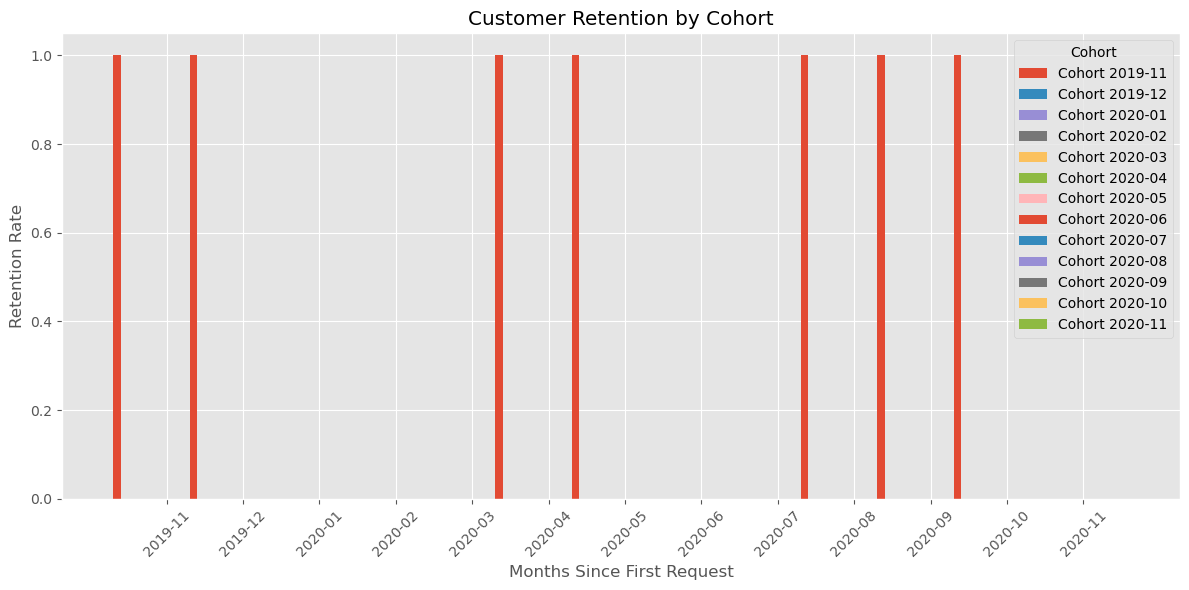

In [249]:
# ensure your retention_rate data is non-empty and has proper labels
retention_rate.index = retention_rate.index.astype(str)

plt.figure(figsize=(12, 6))

# define width for bars
bar_width = 0.1

# create an array of positions for the months (X-axis positions)
x_positions = range(len(retention_rate.columns))

# plot each cohort as a set of bars
for i, cohort in enumerate(retention_rate.index):
    # calculate the x positions for each cohort's bars 
    cohort_positions = [x + i * bar_width for x in x_positions]
    
    # plot a bar for each cohort
    plt.bar(cohort_positions, retention_rate.loc[cohort], width=bar_width, label=f'Cohort {cohort}')

# set title and labels
plt.title('Customer Retention by Cohort')
plt.xlabel('Months Since First Request')
plt.ylabel('Retention Rate')

# set X-axis ticks and labels (center them for the bar positions)
plt.xticks([x + bar_width * len(retention_rate.index) / 2 for x in x_positions], retention_rate.columns.astype(str), rotation=45)

# ensure the legend is created if there are valid labels
plt.legend(title='Cohort')

plt.tight_layout()
plt.show()

In [251]:
###Observations:
#1. Only One Cohort Has Retention Data:
#        It appears that only the "Cohort 2019-11" (November 2019) has retention data, as its bars are the only ones visible.
#        The other cohorts (December 2019 to November 2020) are not being displayed, which suggests they either have no retention data or their retention rates are 0 across all months.
#2. Retention for the November 2019 Cohort:
#        The retention for the November 2019 cohort shows a pattern where users return for certain months but not consistently.
#        Retention rates spike to 100% (1.0) in November 2019, April 2020, August 2020, and October 2020.
#        The rest of the months (January, February, etc.) show 0% retention, meaning no users from the November 2019 cohort returned during those months.
#3. Possible Patterns:
#        The fact that the November 2019 cohort has high retention in some months and 0 retention in others may indicate that users from this cohort are sporadically using the service.
#        Alternatively, it could indicate seasonal behavior where users tend to return at specific times of the year.

#The lack of visible bars for other cohorts (such as December 2019, January 2020, and so on) likely means that none of the users from these cohorts returned after their initial engagement. This could indicate a high churn rate for these cohorts.

In [241]:
##Merge fees data 
merged_df = pd.merge(cash_request_df, fees_df, left_on='id', right_on='cash_request_id', how='left')

In [243]:
# group by cohort and request month to calculate total fees for each cohort and period
fee_analysis = merged_df.groupby(['cohort_month', 'request_month']).agg({'total_amount': 'sum','user_id': 'nunique'}).reset_index()

In [247]:
# pivot the fee analysis to see fees per cohort over time
fee_pivot = fee_analysis.pivot_table(index='cohort_month', columns='request_month', values='total_amount')

In [253]:
##DISPLAY

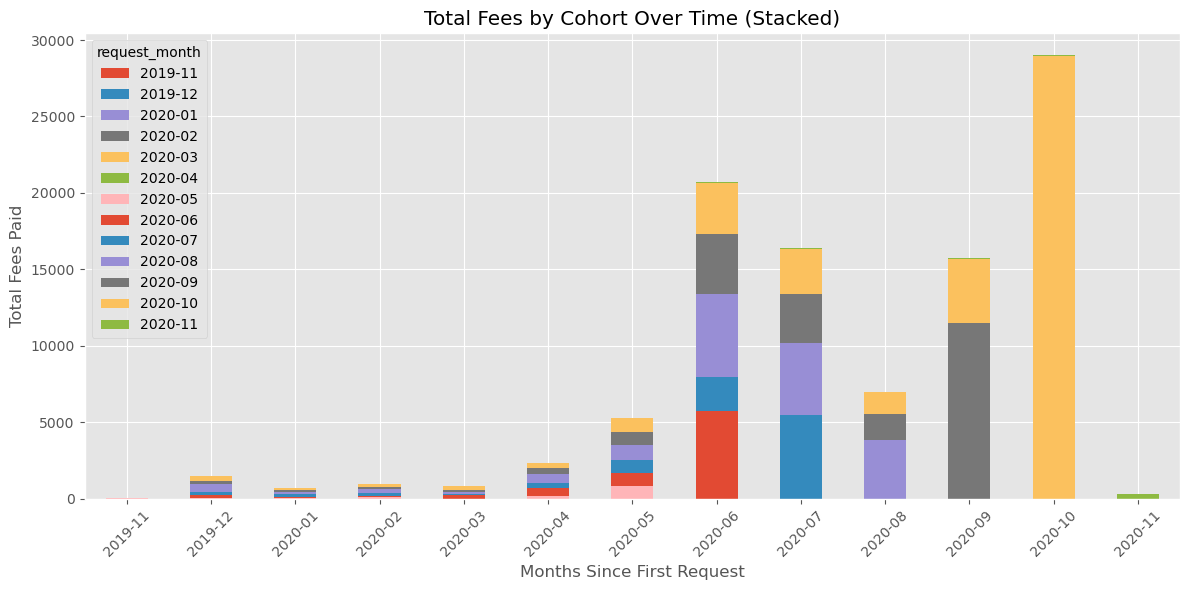

In [255]:
# plot stacked bar chart for total fees
fee_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

# set plot labels and title
plt.title('Total Fees by Cohort Over Time (Stacked)')
plt.xlabel('Months Since First Request')
plt.ylabel('Total Fees Paid')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [257]:
###Observations:
#The October 2020 cohort (yellow) has a significant contribution to total fees in the months October 2020 and September 2020.
#This cohort stands out as one of the most valuable in terms of fee generation, especially compared to earlier cohorts.
#Other cohorts, such as July 2020 (purple) and June 2020 (blue), also show strong contributions in later months, especially around June–August 2020.
#The overall fee amount increases significantly in the later months, particularly around June 2020, September 2020, and October 2020.
#Earlier months (November 2019 through March 2020) show relatively low total fees, but starting from April 2020, there's a notable upward trend in fee generation.
#The plot demonstrates that multiple cohorts contribute to the total fees, especially from April 2020 onward.
#May 2020 through October 2020 show more diverse contributions from cohorts such as November 2019, February 2020, March 2020, April 2020, etc. This diversity shows that different cohorts continue to generate fees over time, even though some cohorts dominate specific months.
#Cohorts from 2019 and early 2020 contribute much less in terms of total fees. For instance, the November 2019 cohort (red) shows only a small contribution in most months.
#This suggests that either fewer users returned from these earlier cohorts or their transactions resulted in smaller fees.
#December 2019 through April 2020 cohorts show very modest contributions, suggesting that retention or activity levels may have been lower in these cohorts compared to later ones.
#There is a sharp increase in fees starting from April 2020, which may suggest some seasonal factors or other events that caused users from multiple cohorts to generate more fees.
#October 2020 has the highest fees overall, which could indicate a major event or promotion that drove increased activity during that period.
#There's a noticeable drop in total fees in November 2020. This could either be due to data incompleteness (if November 2020 is a partial month) or a real drop in activity after the high fees seen in October 2020.
